In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json('../data/processed_data.json')

In [3]:
def idle_exec(log):
    return sum([each['idleExecutor'] for each in log])
def total_exec(log):
    return sum([each['totalExecutor'] for each in log])
def get_jobs(log):
    return ([each['runningjob'] for each in log])
def get_labels(log):
    return ([each['name'] for each in log])
def map_job_labels(row):
    jl_map = {}
    for jobs, label in zip(row['jobs'], row['labels']):
        jl_map[label] = jobs
        jl_map['{}_exec'.format(label)] = len(jobs)
    return jl_map

In [4]:
df['idle'] = df['label'].apply(idle_exec)
df['total'] = df['label'].apply(total_exec)
df['jobs'] = df['label'].apply(get_jobs)
df['labels'] = df['label'].apply(get_labels)

df_tmp= pd.DataFrame(columns=['jl_map'])
df_tmp['jl_map'] = df.apply(map_job_labels, axis=1)

df_jl_map = df_tmp['jl_map'].apply(pd.Series)

dfl_jl_map = pd.concat([df, df_jl_map], axis=1)

dfl_jl_map['idle'] = df['label'].apply(idle_exec)
dfl_jl_map['total'] = df['label'].apply(total_exec)
dfl_jl_map['jobs'] = df['label'].apply(get_jobs)
dfl_jl_map['labels'] = df['label'].apply(get_labels)

In [16]:
df_select = dfl_jl_map[['date', 'gitlabci_exec']]

No handles with labels found to put in legend.


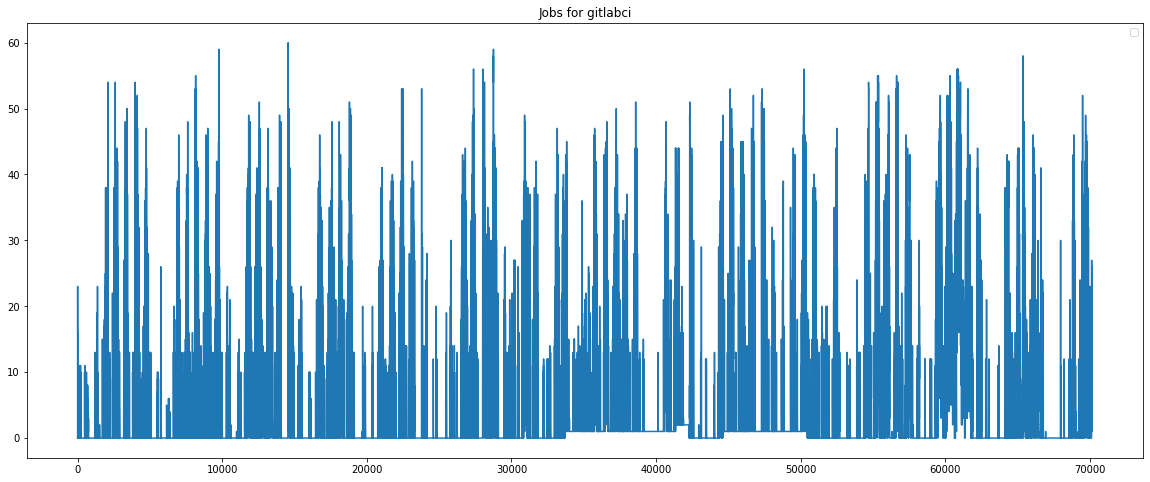

In [17]:
plt.figure(figsize=(20,8))
plt.plot(df_select['gitlabci_exec'])
plt.title('Jobs for gitlabci')
plt.legend()

#### Adding lags

In [20]:
def add_lags(df, n=1, m=15):
    for i in range(n, m):
        df["lag_{}".format(i)] = df.gitlabci_exec.shift(i)

Add n lags with interval

In [21]:
add_lags(df_select, 1, 15)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df_select.head(50)

,date,gitlabci_exec,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,2019-03-15 15:49:11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-15 15:51:11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-15 15:53:08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-15 15:55:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-15 15:57:09,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-03-15 15:59:12,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-03-15 16:01:16,23.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-03-15 16:03:12,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-15 16:05:10,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-03-15 16:07:10,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Building the linear model 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
y = df_select.dropna().gitlabci_exec   # Contains the value at each point
X = df_select.dropna().drop(['gitlabci_exec'], axis=1)  # Contains the lags as features

In [31]:
X.set_index('date', inplace=True)

In [32]:
X.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
date,,,,,,,,,,,,,,
2019-03-15 16:17:12,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-15 16:19:10,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0
2019-03-15 16:21:09,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0
2019-03-15 16:23:10,6.0,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0
2019-03-15 16:25:17,3.0,6.0,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0


In [33]:
y.head()

14    7.0
15    7.0
16    6.0
17    3.0
18    1.0
Name: gitlabci_exec, dtype: float64

In [34]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

In [47]:
X_train.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
date,,,,,,,,,,,,,,
2019-03-15 16:17:12,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-15 16:19:10,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0
2019-03-15 16:21:09,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0,0.0
2019-03-15 16:23:10,6.0,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0,0.0
2019-03-15 16:25:17,3.0,6.0,7.0,7.0,9.0,15.0,4.0,12.0,14.0,14.0,16.0,23.0,0.0,0.0


In [48]:
X_test.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
date,,,,,,,,,,,,,,
2019-06-05 13:18:36,32.0,45.0,51.0,51.0,27.0,35.0,41.0,43.0,36.0,30.0,18.0,20.0,11.0,13.0
2019-06-05 13:20:02,31.0,32.0,45.0,51.0,51.0,27.0,35.0,41.0,43.0,36.0,30.0,18.0,20.0,11.0
2019-06-05 13:21:30,36.0,31.0,32.0,45.0,51.0,51.0,27.0,35.0,41.0,43.0,36.0,30.0,18.0,20.0
2019-06-05 13:24:13,32.0,36.0,31.0,32.0,45.0,51.0,51.0,27.0,35.0,41.0,43.0,36.0,30.0,18.0
2019-06-05 13:25:13,33.0,32.0,36.0,31.0,32.0,45.0,51.0,51.0,27.0,35.0,41.0,43.0,36.0,30.0


In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lr.score(X, y)

0.8513001104531064

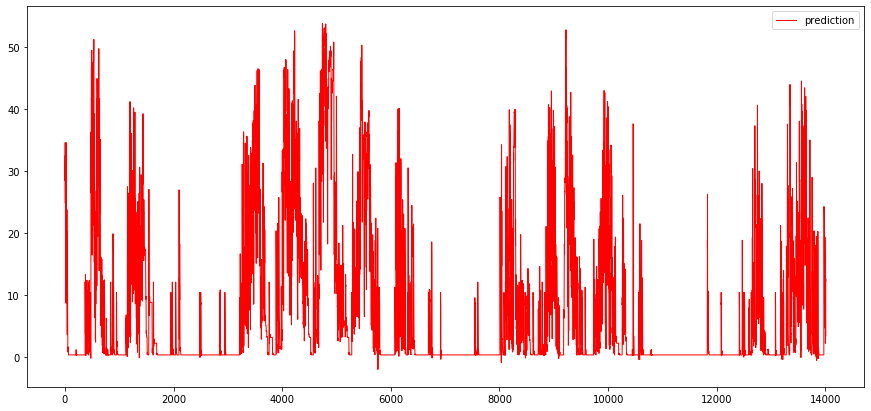

In [44]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction,  label="prediction", linewidth=1.0, color='r')
plt.legend(loc="best")

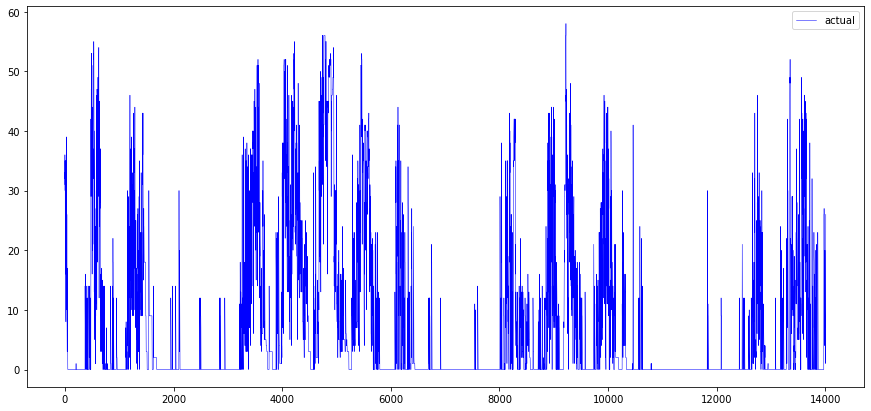

In [46]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(y_test.values, label="actual", linewidth=0.5, color='b')
plt.legend(loc="best")

In [42]:
r2_score(y_test, prediction) 

0.9070862113702115

In [56]:
mean_squared_error(y_test, prediction)

14.322154767160214

In [51]:
def plotCoefficients(model):
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

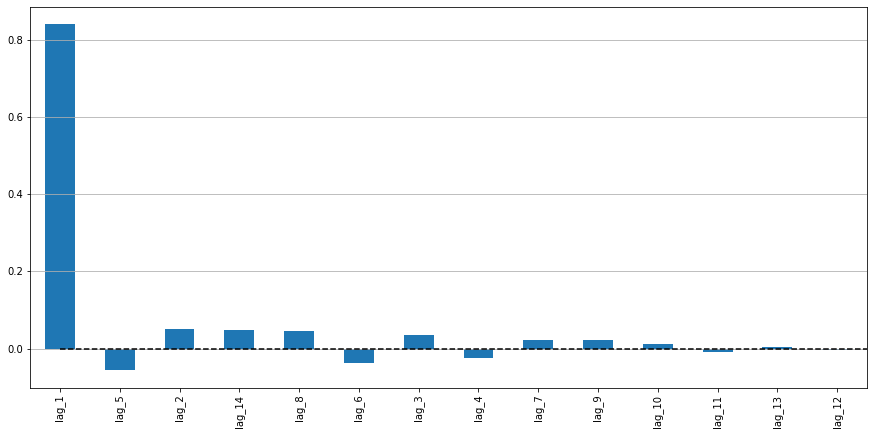

In [54]:
plotCoefficients(lr)